# DC MAGNETRON SPUTTERING MODEL 

## ES 91R Research Report

This model simulates the deposition characteristics of a 3-gun, tilted circular magnetron sputtering system under DC sputtering of metals. With limited experimental data, it achieves predictions that are within 3 percent of experimental observations.

<p style="text-align: center;"> Prepared by: Egemen Bostan </p>

<p style="text-align: center;"> Project Advisor: Quan Jiao </p>

<p style="text-align: center;"> Faculty Advisor: Joost Vlassak </p>

<p style="text-align: center;"> Vlassak Lab </p>

<p style="text-align: center;"> Harvard SEAS </p>

<p style="text-align: center;"> December 2021 </p>
    


## Physical Model

The following is a brief overview of the physical model for this project.



Inside a sputtering system, atmospheric air is removed and replaced with inert gas Argon at a pressure in the mTorr range. A strong electric field is generated to ionize the Argon gas by connecting the target to a negative potential. As a result, Argon ions are accelerated towards the target surface. The Argon ions collide with the target surface and some target material's atoms are 'sputtered' away from the target due to the energy of the collisions. A magnetic field is generated to 'surround' the target to that electrons are confined within the region, increasing Argon ionization and thus rate of 'sputtering'. Supplied power controls the rate of Argon ion generation, while potential difference controls the energy of incident ions. The sputtering rate and angular distribution are dependent on target material, target erosion profile, Argon incident angle and Argon energy distribution. 

Instead of attempting a micro-scale simulation of the proess, this model attempts to use generalizeable empirical parameters that can be found in literature or calculated with the experimental setup.

The 'sputtered particles' travel in various directions away from the target surface. On their path, they collide with Argon particles in random motion. Amount of collisions is a function of travel distance (working distance WD) and pressure inside the chamber (a proxy of Argon number density under isochoric chamber condition).

When multiple guns are simultaneously ran,'resputtering' occurs. Target atoms and neutral Argon atoms that have 'bounced back from the target' arrive at the substrate and impact with large energies (yet lower than initial Argon energies), causing sputtering at the substrate surface. This phenomenon is a function of material deposition rates, reflected Argon energy and angular distributions.

In the following section, physical parameters and their models are elaborated.

### Angular Sputtering Distribution

There are several competing models for angular sputtering distribution when an Argon ion collides with the target surface. A common model is the one developed by Yamamura et. al [1].


$$ S(E, \theta , \theta_1) = 0.042 \frac{\alpha S_n}{U_s} cos(\theta_1) \times [1 - 0.5 E_r^{0.5} \left( cos(\theta) \gamma(\theta_1) + \frac{3}{4} \pi sin(\theta)sin(\theta_1) \right)$$

where 

$$\gamma(\theta_1) = \frac{3 sin^{2}(\theta_1) -1}{sin^{2}(\theta_1)} + \frac{cos^{2}(\theta_1)\left[ 3 sin^{2}(\theta_1) + 1 \right] }{2 sin^{3}(\theta_1)} \times \left( \frac{1 + sin(\theta_1)}{1 - sin(\theta_1)} \right)$$

and

$$
E_r = \frac{E_{th}}{E}.
$$

$E$ is incident Argon ion energy, $E_{th}$ is the minimum energy needed for sputtering, $U_s$ is the binding energy of target material, $S_n$ is the nuclear stopping energy of the target material, $\theta$ is the angle of incidence of Argon ions$, \theta_1$ is the sputtering angle, and $\alpha$ is a fit function of target material. 


This is developed by modifying Lambert's cosine emission law, which states angular emission distribution is proportional to cosine of the angle from surface normal. 

This model, though it incorporates many physical interactions, still relies on experimentally determined parameters such as alpha. 

Instead,a paper by [2] modifies the cosine emission law to transform the circle (formed by the cosine) into an ellipse with empirically determined aspect ratio. 

This is demonstrated in the figure below.




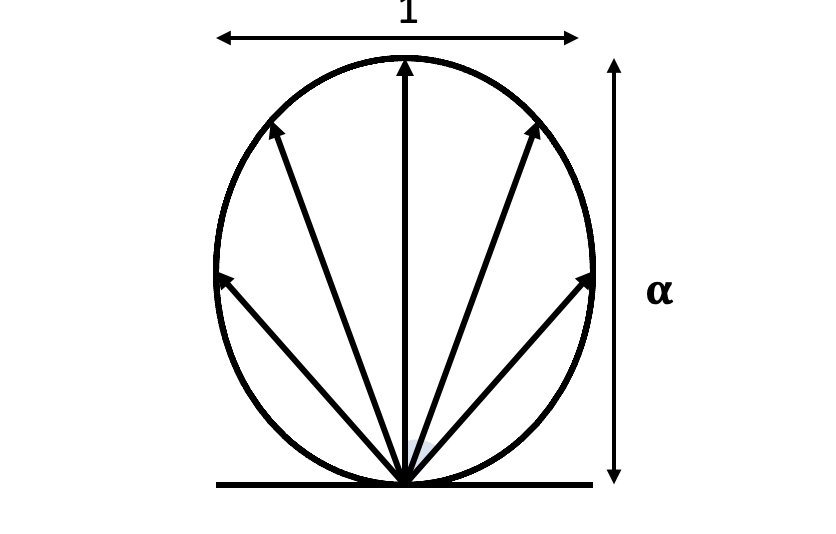
<p style="text-align: center;">  <b> Figure 1: </b> Elliptical Emission Law. Arrow lengths ascertain relative yield for the arrow's direction. </p>

The paper claims that an $\alpha$ value of 4 provided best fit with their data. This value forms the basis of this model. The equation used for this model is as follows:

$$
Y(\theta_t) = \frac{\cos{\theta_t}}{\alpha^2 + (1- \alpha^2) \cos{\theta_T}^2}   \qquad (1)
$$

where $Y$ is the yield value, $\theta_t$ is the angle from target normal, and $\alpha$ is the aspect ratio.

### Target Erosion Profile

Due to the shape of the 'racetrack shaped' magnetic field around the target, not all points on the target sputter the same amount of atoms. 

An easy way to observe this fact is to look at the 'erosion profile' of the target. It displays radial symmetry and axial asymmetry. This suggests that the erosion profile can be modeled with a radial function. 

The inverse of the erosion profile indicates the relative frequency of sputtering from that point on the target. Hence, it is taken into consideration while simulating sputtering. 

To measure the target surface, modelling clay was pressed on an eroded target from the system, then the clay model was sliced from its center to get a radial profile. This profile was imaged and analyzed in Tracker software to generate a large number of points for a best-fit line.

A sum of two Gaussian distributions was used as the curve-fit function. Parameters were calculated in MATLAB and the resulting function was used in the python model as a sputtering probability distribution function for radial position on the target.







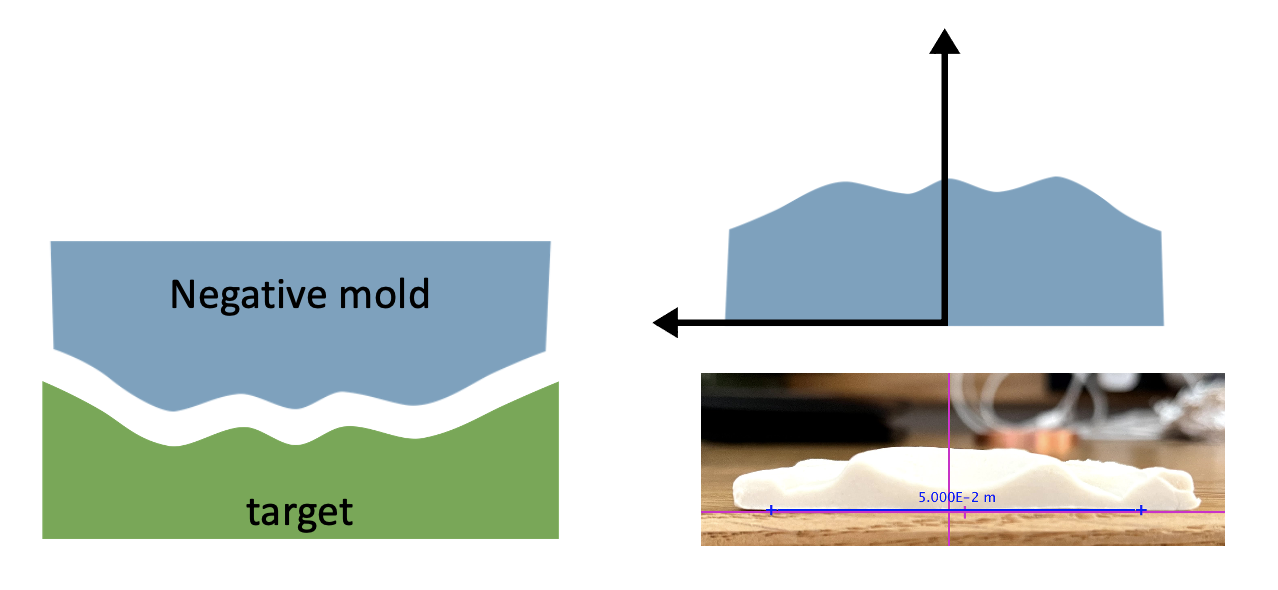

<p style="text-align: center;">  <b> Figure 2: </b> The procedure for generating target erosion profile and a screen-capture from Tracker software used to generate datapoints for best-fit curve.  </p>

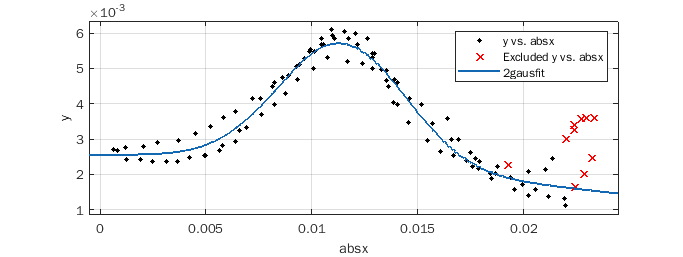

<p style="text-align: center;">  <b> Figure 3: </b> The curve of best-fit (inverted for PDF) on MATLAB, all dimensions (erosion depth for y, radial distance for x) are in meters. The resulting function is used for target erosion profile.  </p>

### Sputtered Particle Collisions - Straight Line Assumption 

If the sputtered particles collide with many particles on their way to the substrate, they will lose their directional kinetic energy due to the collisions and start moving in random directions instead, reaching the energy distribution of the gaseous Argon in the chamber (and not deposit on the substrate). This process is known as thermalization.

Westwood [3] has developed a model to predict the number of collisions needed for thermalization.

Let 

$$ratio = \frac{M_{target}}{M_{Ar}}$$

$$M = \frac{1}{ratio}$$

$$W = 1 - \left[  \frac{\|1- M \|^2}{2 M}  \right] \cdot \ln \left( \frac{1+M}{\|1-M\|}\right) $$

$$\nu = \ln \left( \frac{E_t}{E_{Ar}}\right) \ln{ e^W} = \ln \left( \frac{E_t}{E_{Ar}}\right) \cdot W $$

where $\nu$ is the number of collisions it takes for the energy of the sputtered atom to reduce to energy of gas atoms (the state of thermalization), $E_{Ar} = \frac{3}{2}k_B T_{chamber}$ is the average kinetic energy of Argon atoms suspended in the chamber, $ratio$ is the ratio of molecular masses of target atoms and Argon atoms, $E_t$ is the energy of the target atom as it leaves the target surface.




Alvarez et. al [4] have developed a model to predict the ratio of thermalization as a function of target material, ionizing gas (Argon in this model) and chamber temperature.  

Let
$$
\sigma_g = \pi \left( R_1 + R_2 \right)^2 \cdot \sqrt{1 + \frac{M_2}{M_1}}
$$ 
and 
$$
\chi = \frac{\sigma_g}{k_B T_g \nu}
$$
to obtain the relative deposition rate at an angle $\omega$ (as a proportion of flux near the target surface)  as:

$$
\Delta(\omega) = \exp( - \chi P_{chamber} \textrm{WD} ) (1- cos(\omega))
$$

where $P_{chamber}$ is sputtering chamber pressure and $\textrm{WD}$ is the working distance, as previously defined.

When first order approximations are used to estimate the effects of thermalization, they are found to be negligible for this chamber length and other geometric configurations. This conclusion is shared by [5].


In light of this conclusion, it is assumed that sputtering particles follow a straight line determined at the sputtering process and reach the substrate, excepting resputtering effects, to be discussed later.

### Magnetron(Gun) Power

It is established at power of the gun is proportional to deposition rate, and that has no effect on angular distribution [6][7]. This relationship is used in the model.

### Sputtering Yield Ratios 

The absolute yield of sputtering is subject to many physical factors that are challenging to calculate without empirical parameters. Coupled with the ease with each a single-point thickness measurement can be made, most models are based on relative thickness calculations, which are normalized to experimental values to predict absolute deposition rates over a surface[2][5][8][9]. This model follows this precedent.

In terms of comparing the yield rates of different target materials (as it is a function of target material), industrial reference values are taken from [10].

Alternatively, relative yield rates (called yield ratios) could be derived by coating a rotating substrate with the same gun for the same duration with the same power and dividing absolute thicknesses. This method was devised, but not executed due to time limitations.


### Resputtering Coefficient

A paper by Gregoire et. al proposes a mechanism for quantifying resputtering rates for simultaneous cosputtering [11]. A main feature of the model is the existence of empirical resputtering coefficient matrix, presented for 27 commonly used target materials.

The paper argues that resputtering of target A by target B is a function of probability of collision with A on the substrate, deposition rate of A, and resputtering coefficient of A,B that captures multiple other physical parameters. 

In this model, this method is adapted from the aforementioned paper, and the coefficient values (not available in the paper) are calculated by monotonic iterative changes to discover local minima in the deviation between experimental results and model results. The coefficients are assumed to be linearly independent, and constant across different experiments with the same target materials. 

The following equation demonstrates the resputtering effect.

Let $D_A$ be deposition rate for gun with target material 'A', $D_{Ar}$ for deposition rate with resputtering and $D_{Ac}$ without; $\Gamma_{A,B}$ be the resputtering coefficient for A by B; $yr_A$ be the yield ratio of target of material A :

$$D_{1r} = D_{1c} - \frac{yr_1}{\Sigma yr} \Gamma_{1,1} D_{1c}  - \frac{yr_2}{\Sigma yr} \Gamma_{1,2} D_{2c}  - \frac{yr_3}{\Sigma yr} \Gamma_{1,3} D_{3c}  \qquad (2) $$

describes the resputtering-factored deposition rate for Gun 1. Gun 2 and 3 are similarly calculated.


## Geometric Configuration

In this section, the geometric configuration of the system and its implementation in code is summarized.

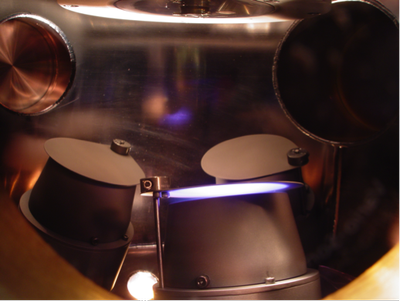


<p style="text-align: center;">  <b> Figure 4: </b> AJA International ATC 1800, inside the chamber  while a single gun is active [12]. </p>


### Single Gun and Chamber Geometric Measurements

Each gun is parametrized with the labeled measurements below. Additionally, the relative position of each gun is ascertained by measuring the position of their pivot points (PP).

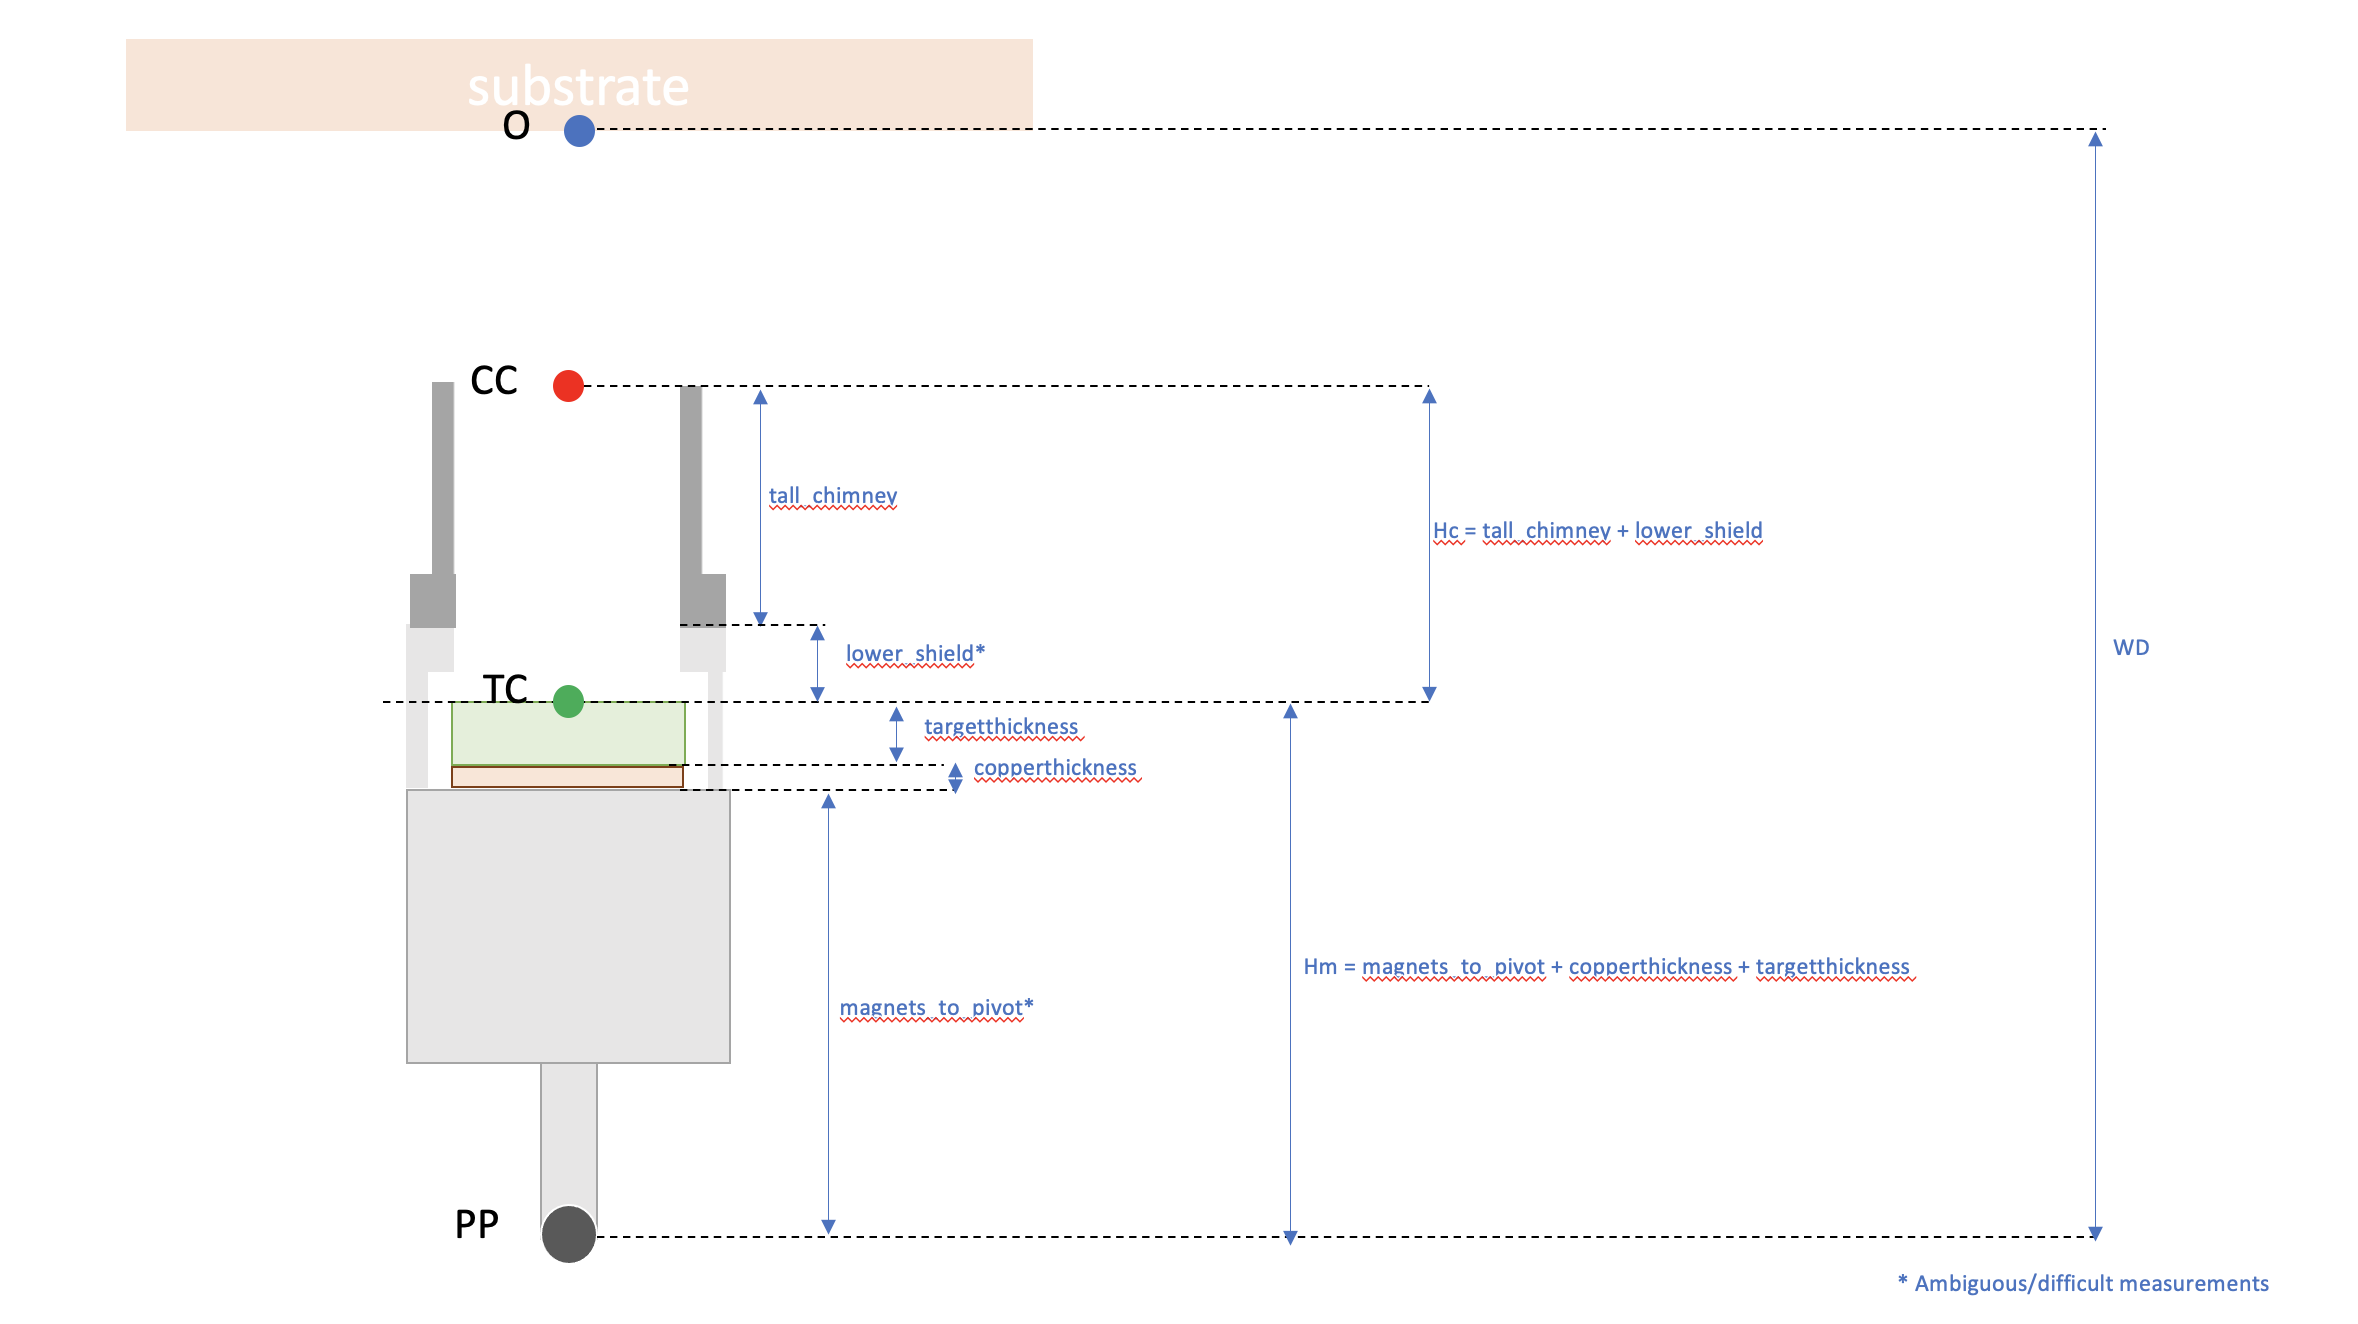

<p style="text-align: center;">  <b> Figure 5: </b> Diagram for a single magnetron. </p>

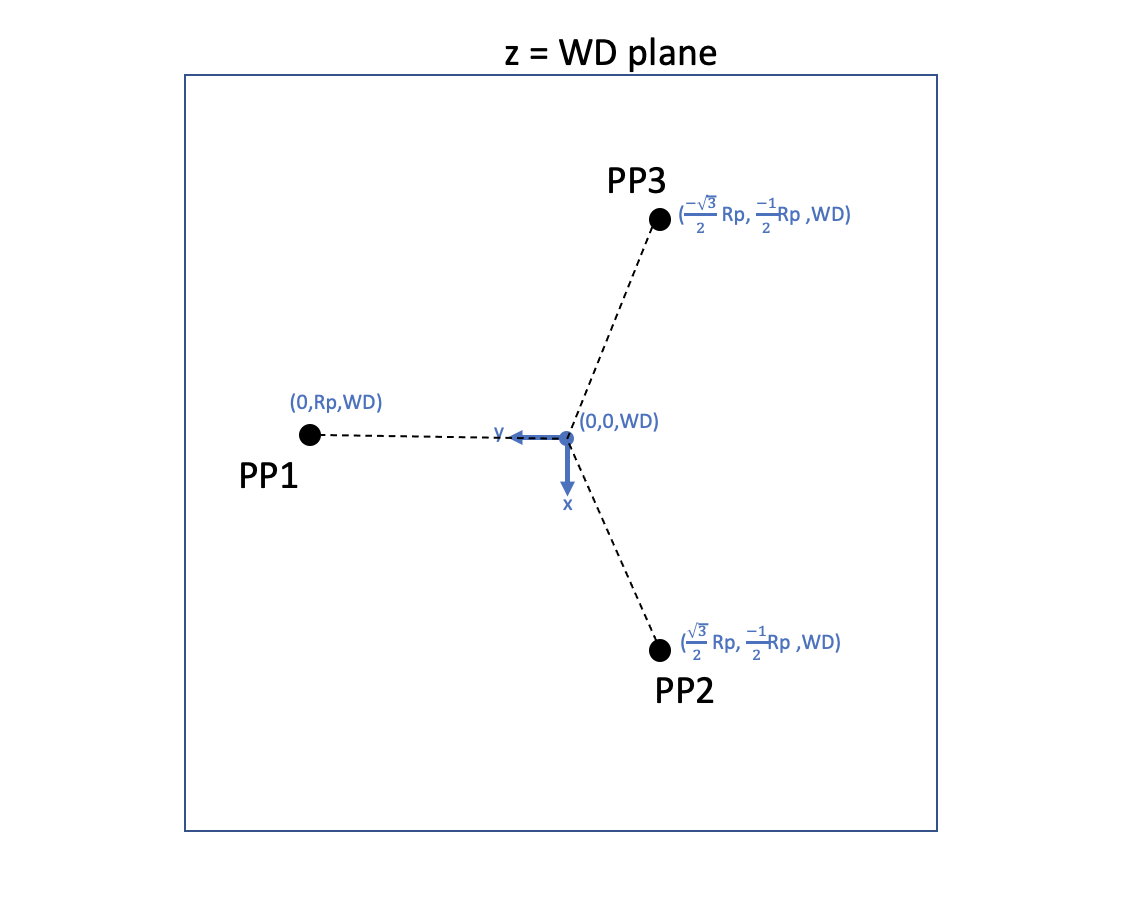

<p style="text-align: center;">  <b> Figure 6: </b> Diagram shows the relative position of pivot points for each gun. </p>

For future reference, it is important to note that some variables are more important or easily variable. The table below lists such variables as parameters.

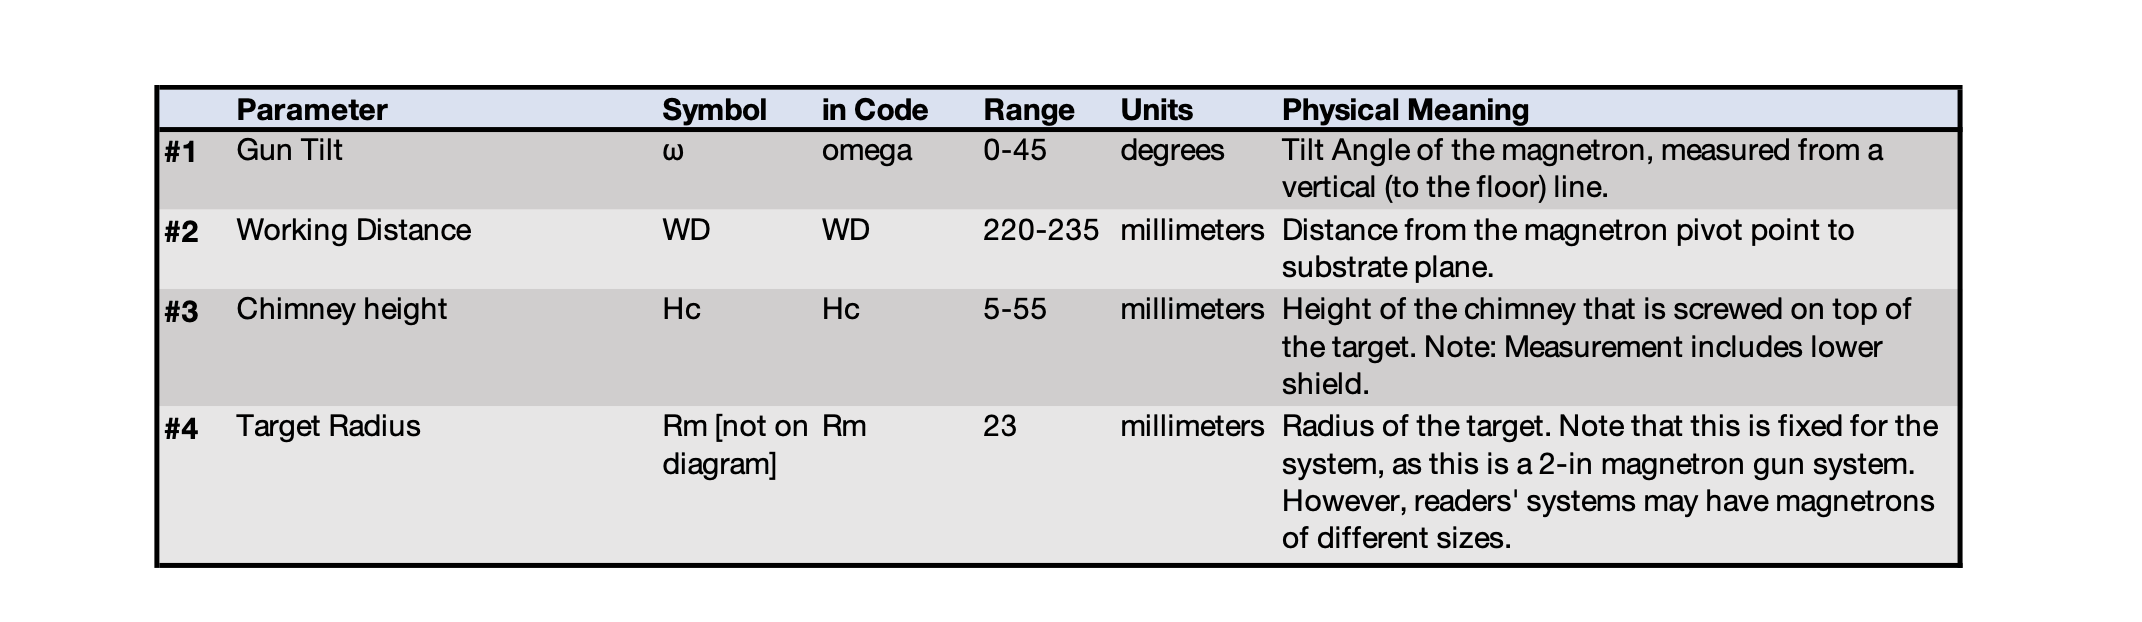

<p style="text-align: center;"> Critical variables for a single gun system. Note that this does not include the relative position of the three-guns with respect to one another.  </p>

### Multiple Gun Model Visualization 

The following image is generated in the model as it executes its simulation. It is used to verify the geometric configuration of the model.

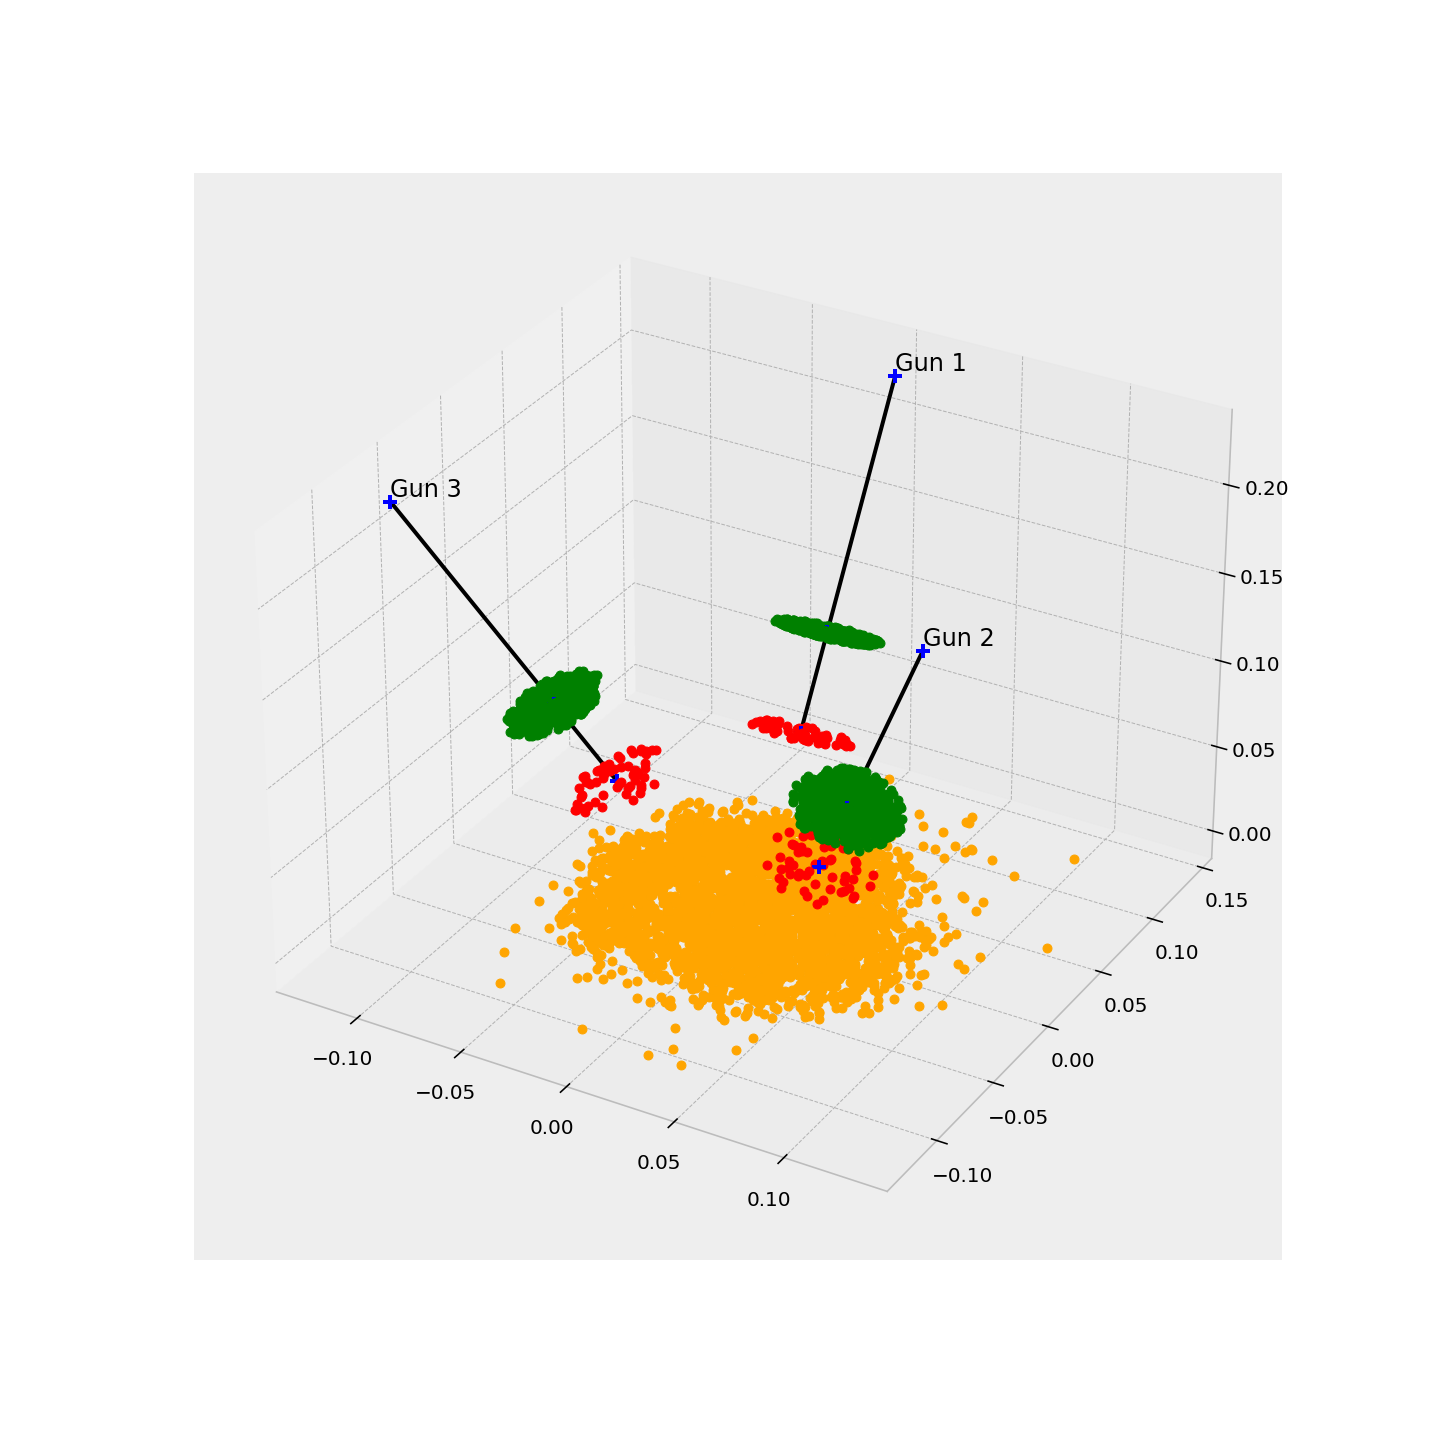

<p style="text-align: center;">  <b> Figure 7: </b> Visualization of the 3-gun configuration in the model. Green corresponds to the target surface, red corresponds to the gun chimney opening, orange surface is the plane where the substrate is located. Note that this perspective is inverted in real life, where the substrate is on top of the guns. This example uses 400 points for the model, reduced for visualization. In the main Monte Carlo simulations, 750 000 points are used. </p>

From this visualization, a major challenge is highlighted - the gun chimneys. The chimneys are used to minimize cross-target contamination and chamber side-wall sputtering rates. As a result, they block a proportion of sputtered particles, and this proportion is dependent on the position on the target and angular distribution. Except under certain geometric restrictions that are not warranted in this sputtering system, this makes analytical closed-form solutions implausible according to [5]. 

This problem motivates the choice of Monte Carlo simulation method, as will be discussed under the computational model section.

## Computational Model

### Monte Carlo Integration

While acknowledging the challenges of a closed form analytical solution, deterministic numerical methods can be still employed. Approximating the target surface as a series of points iterating over two variables, the integration for the deposition at a single surface point can be executed with a 'shadowing condition' that checks if the straight line between the target point and the substrate point is obstructed by the chimney. 

Due to this shadowing condition, this method is exceedingly slow. A previous iteration of this model used this method with parallelization and suffered from very long calculation times (in the order of hours) that negate the motivation behind this model - a quicker, first-order approximation without a sophisticated physical simulation.

Instead, a Monte Carlo method is used. To avoid the necessity of a shadowing condition, the code uses a random uniform distribution to generate $M$ number of points in the opening created by the chimney (referred as CC in the multiple gun visualization figure). 

For each of the generated points in the opening, $N$ number of points is generated on the target the probability distribution function determined by the target erosion profile.

For all of the $M \times N$ combinations, a ray is created and intersected at the substrate plane (orange dots in previous figure). The intersection point is recorded as the deposition point, and the ray is used to calculate the angle from target normal, which determines the 'deposition value' for this ray with the angular sputtering distribution function. 




### Interpolation

The deposition points and their values are used for interpolation to create a constant-resolution map (a 2-D matrix) of deposition values. Then, Gaussian Kernel Density Estimation is applied to the interpolated data with weights equal to their values to factor in the deposition value in the interpolated deposition map. To compare against other guns with different materials and powers, the map is multiplied by scalars power and yield ratio for that target material. The result is the model's prediction for a single-gun sputtering experiment. 

### Visualization

The equation for a circle is used to locate the points on the substrate map that coincide with the substrate itself - a 4 inch wafer (as opposed to empty space on the substrate plane). The points outside the substrate are set to NaN to make sure they do not influence mathematical operations. This also enables easier visualization with colormaps. 

### Resputtering

After single-gun model is ran for the specified parameters for all three guns, the equation described in Physical Model section is employed to calculate the deposition maps with resputtering. 

### Atomic ratio transformation

The result of the previous steps is relative yields in terms of atoms. They are converted into percentages and visualized with similar steps.  

### Ternary Composition Space Plots

Given the atomic ratio maps, a plot is generated such that distance towards a vertex labeled with a material is proportional to $1-\%_{ material}$. As there are three guns in this system, resulting shape is an equilateral triangle.

## Experimental Data Collection

To ascertain empirical parameters and measure the accuracy of the model, sputtering experiments were conducted and the substrates were characterized. 

### Table of Experiments 

The following table summarizes the conducted experiments, including characterization measurement methods.

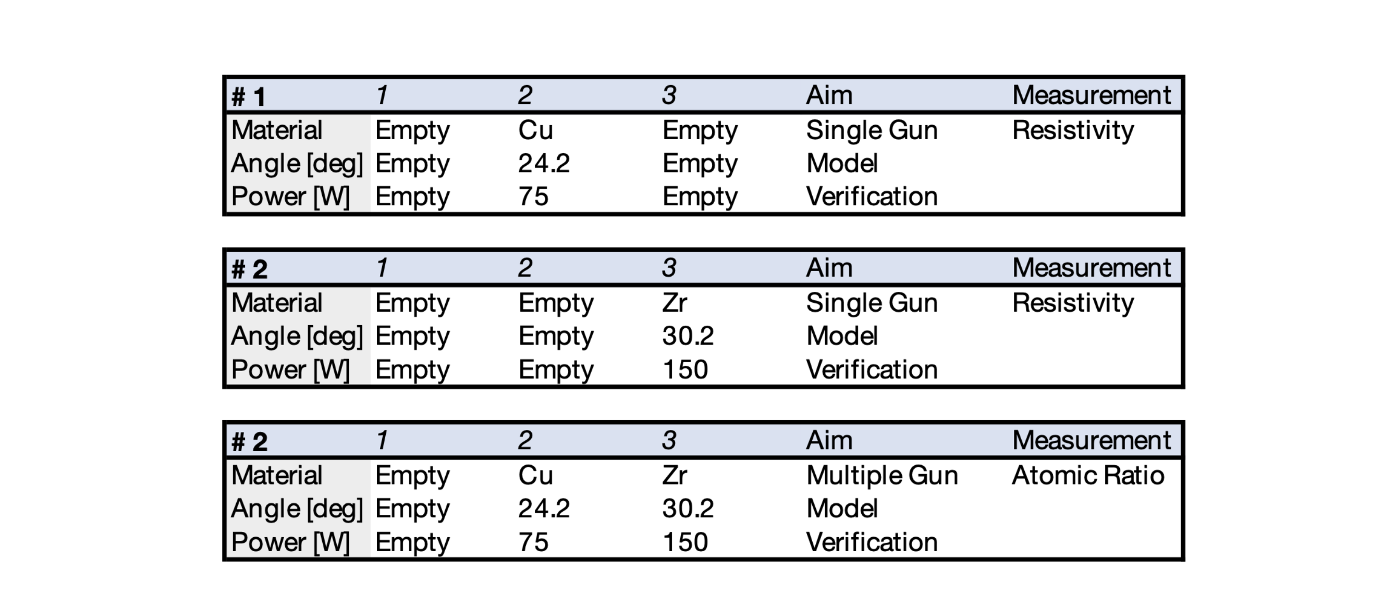

### Substrate Characterization Methods

#### Resistivity Measurements
Resistivity measurements were executed with a 4-point probe measurement device ResMap 178 at Center for Nanoscale Systems (CNS) for 151 points per substrate. 


#### Atomic Ratio Measurements
Atomic ratio measurements were executed with the Oxford Instruments EDS detector equipped to JEOL JSM-7900F scanning electron microscope (SEM) for 29 points per subsrate.

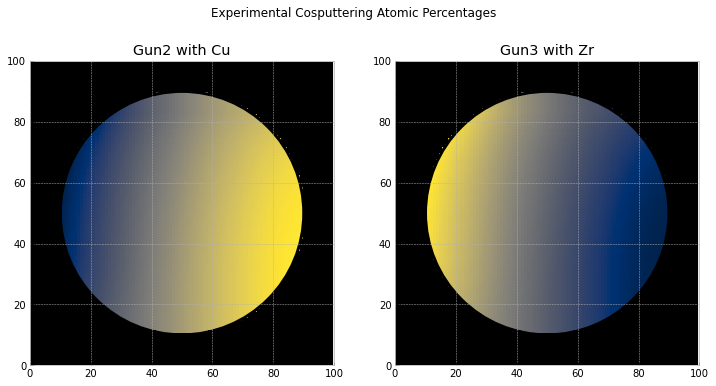

<p style="text-align: center;">  <b> Figure 9: </b> Atomic Ratio Experimental Data. Note that since there are only two guns (and thus two materials), the atomic ratios are complementary to each other, summing to a hundred percent at every point. </p>

#### Interpolation

Interpolation - as described in Computational model section -  was applied to experimental data to obtain matrices of the same size as the model output.



#### Error Sources

Two major sources of error were identified. 

The first is the orientation of the substrate wafer during sputtering. To ascertain the direction of sputtering, it is important to record the orientation of the wafer (by its flat edge) when loading to the substrate system in relation to the position of the guns. Otherwise, while the relative angular spacing between guns will be maintained, absolute orientation of one gun will be difficult to identify in relation to the measurement characterizations that come after. 5-10 degree misalignments are difficult to detect and yet have significant bearing on results. 

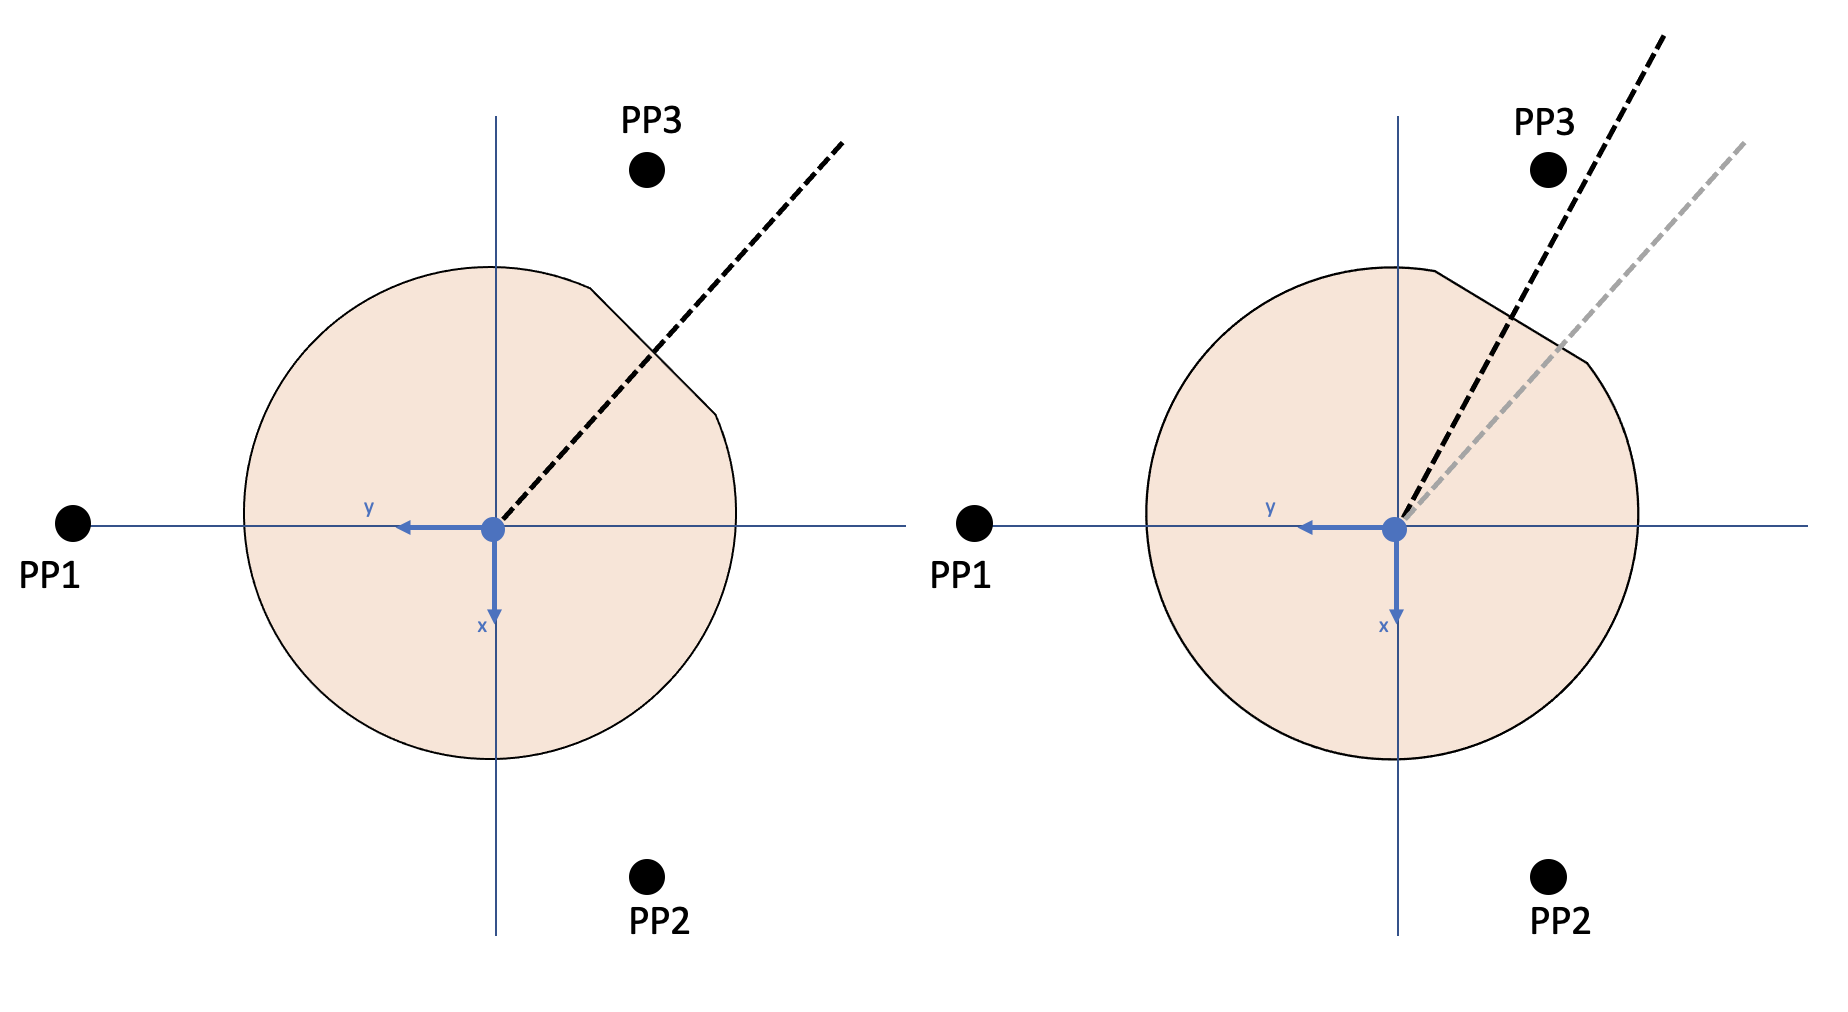
<p style="text-align: center;">  <b> Figure 10: </b> Wafer orientation error occurs because the substrate holder for the sputtering system does not have an aligner. It causes a rotation with respect to the reference point for measurements, as shown by the misalignment of radial lines on the diagram.  </p>


Secondly, the resistivity measurements rely on a 4-point probe system that seems to give unrealistic data at the edges of a wafer or where film thickness is very large. This may be because large thicknesses have different structure or that film does not strongly adhere to the wafer at the edges, introducing misleading effects. The reader should note the top edge of the experimental data for experiment 1, and the edges of the substrate all around for experiment 2.  



## Results

### Single Gun

#### Experiment 1

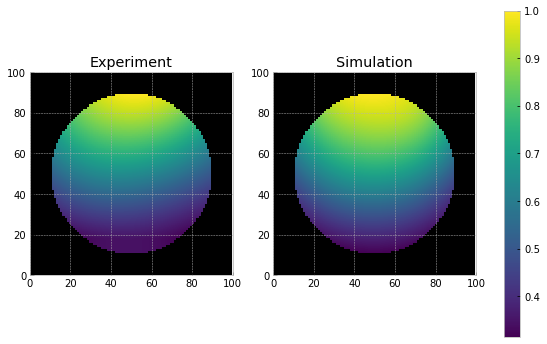

<p style="text-align: center;">  <b> Figure 11: </b> Experiment 1 Substrate Deposition Profile </p>



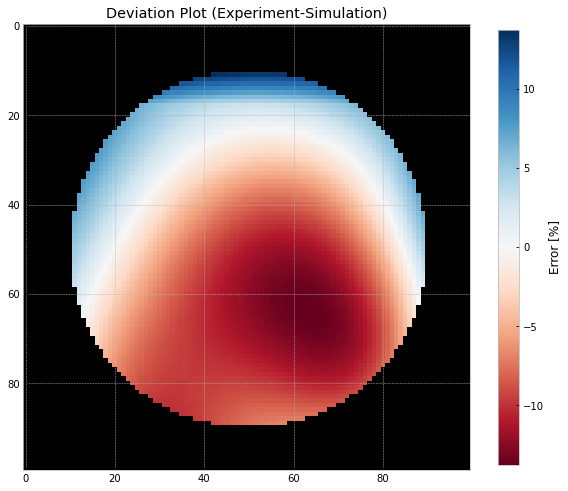

<p style="text-align: center;">  <b> Figure 12: </b> Experiment 1 Substrate Deposition Profile Percentage Error. Average Error was 1.9% . </p>



#### Experiment 2

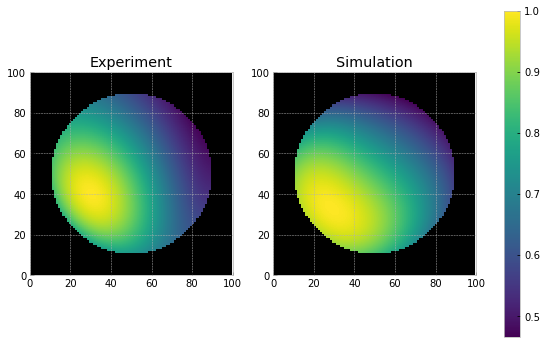

<p style="text-align: center;">  <b> Figure 13: </b> Experiment 2 Substrate Deposition Profile </p>

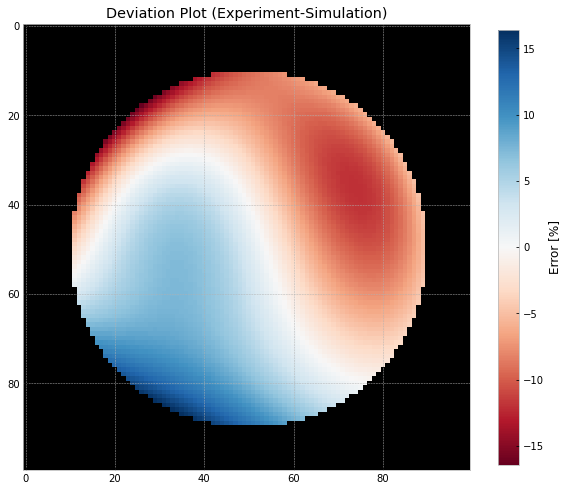

<p style="text-align: center;">  <b> Figure 14: </b> Experiment 2 Substrate Deposition Profile Percentage Error. Average Error was 2.3% . </p>

### Two-Gun

#### Experiment 3

Since percentage maps of 2 target materials will be the complement of each other, only one (for Cu) is shown.



##### Before Resputtering is calculated

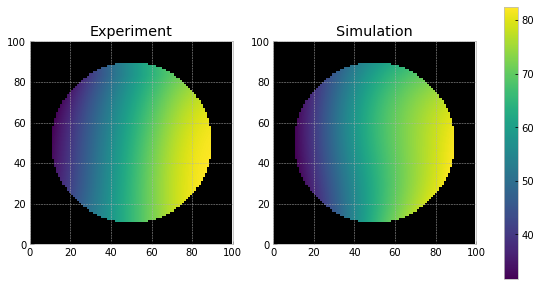

<p style="text-align: center;">  <b> Figure 15: </b> Experiment 3 [before Resputtering] Substrate Deposition Profile for Cu as a percentage of total deposition . </p>



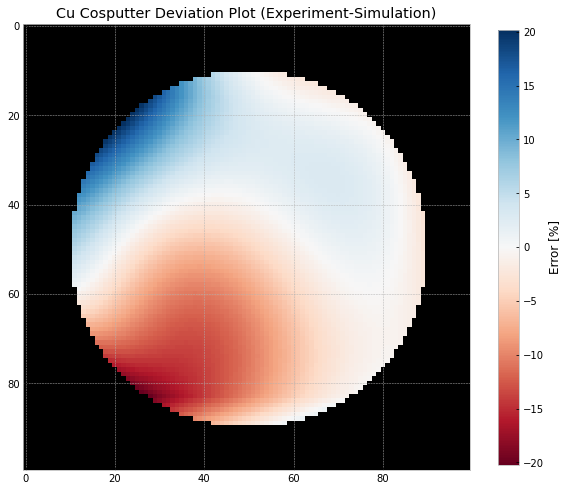

<p style="text-align: center;">  <b> Figure 16: </b> Experiment 3 [before Resputtering] Substrate Deposition Profile, Percentage error for Cu. Average Error was 5.3% . </p>


##### After Resputtering is calculated



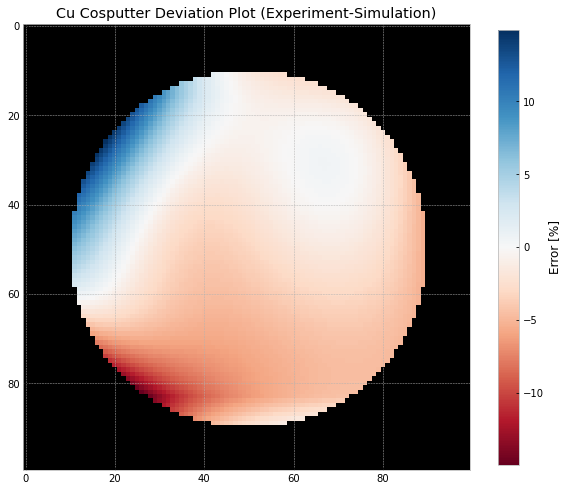

<p style="text-align: center;">  <b> Figure 17: </b> Experiment 3 Substrate Deposition Profile, Percentage error for Cu. Average Error was 2.2% . </p>

#### Composition Space Plot

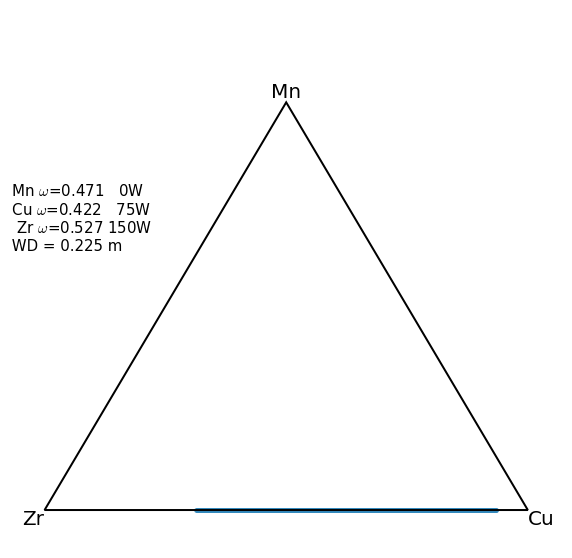

<p style="text-align: center;">  <b> Figure 18: </b> Experiment 3 Composition Space Ternary Plot. Note that since Mn is a placeholder with zero deposition, the range of values (b) is a line across the vertex for Mn, between Zr and Cu. </p>



### Three-Gun

Even though no experiment was run, the model can be used to generate expected output by entering any desired parameters. Below is a grid of composition space plot with varying parameters, generated to demonstrate the different areas generated in the composition space with 3 guns.

#### Composition Space Plot






###### Single Plot

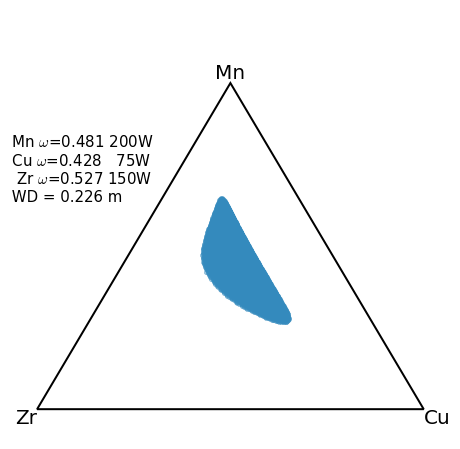

<p style="text-align: center;">  <b> Figure 19: </b> Three-gun Composition Space Ternary Plot. </p>

###### Grid

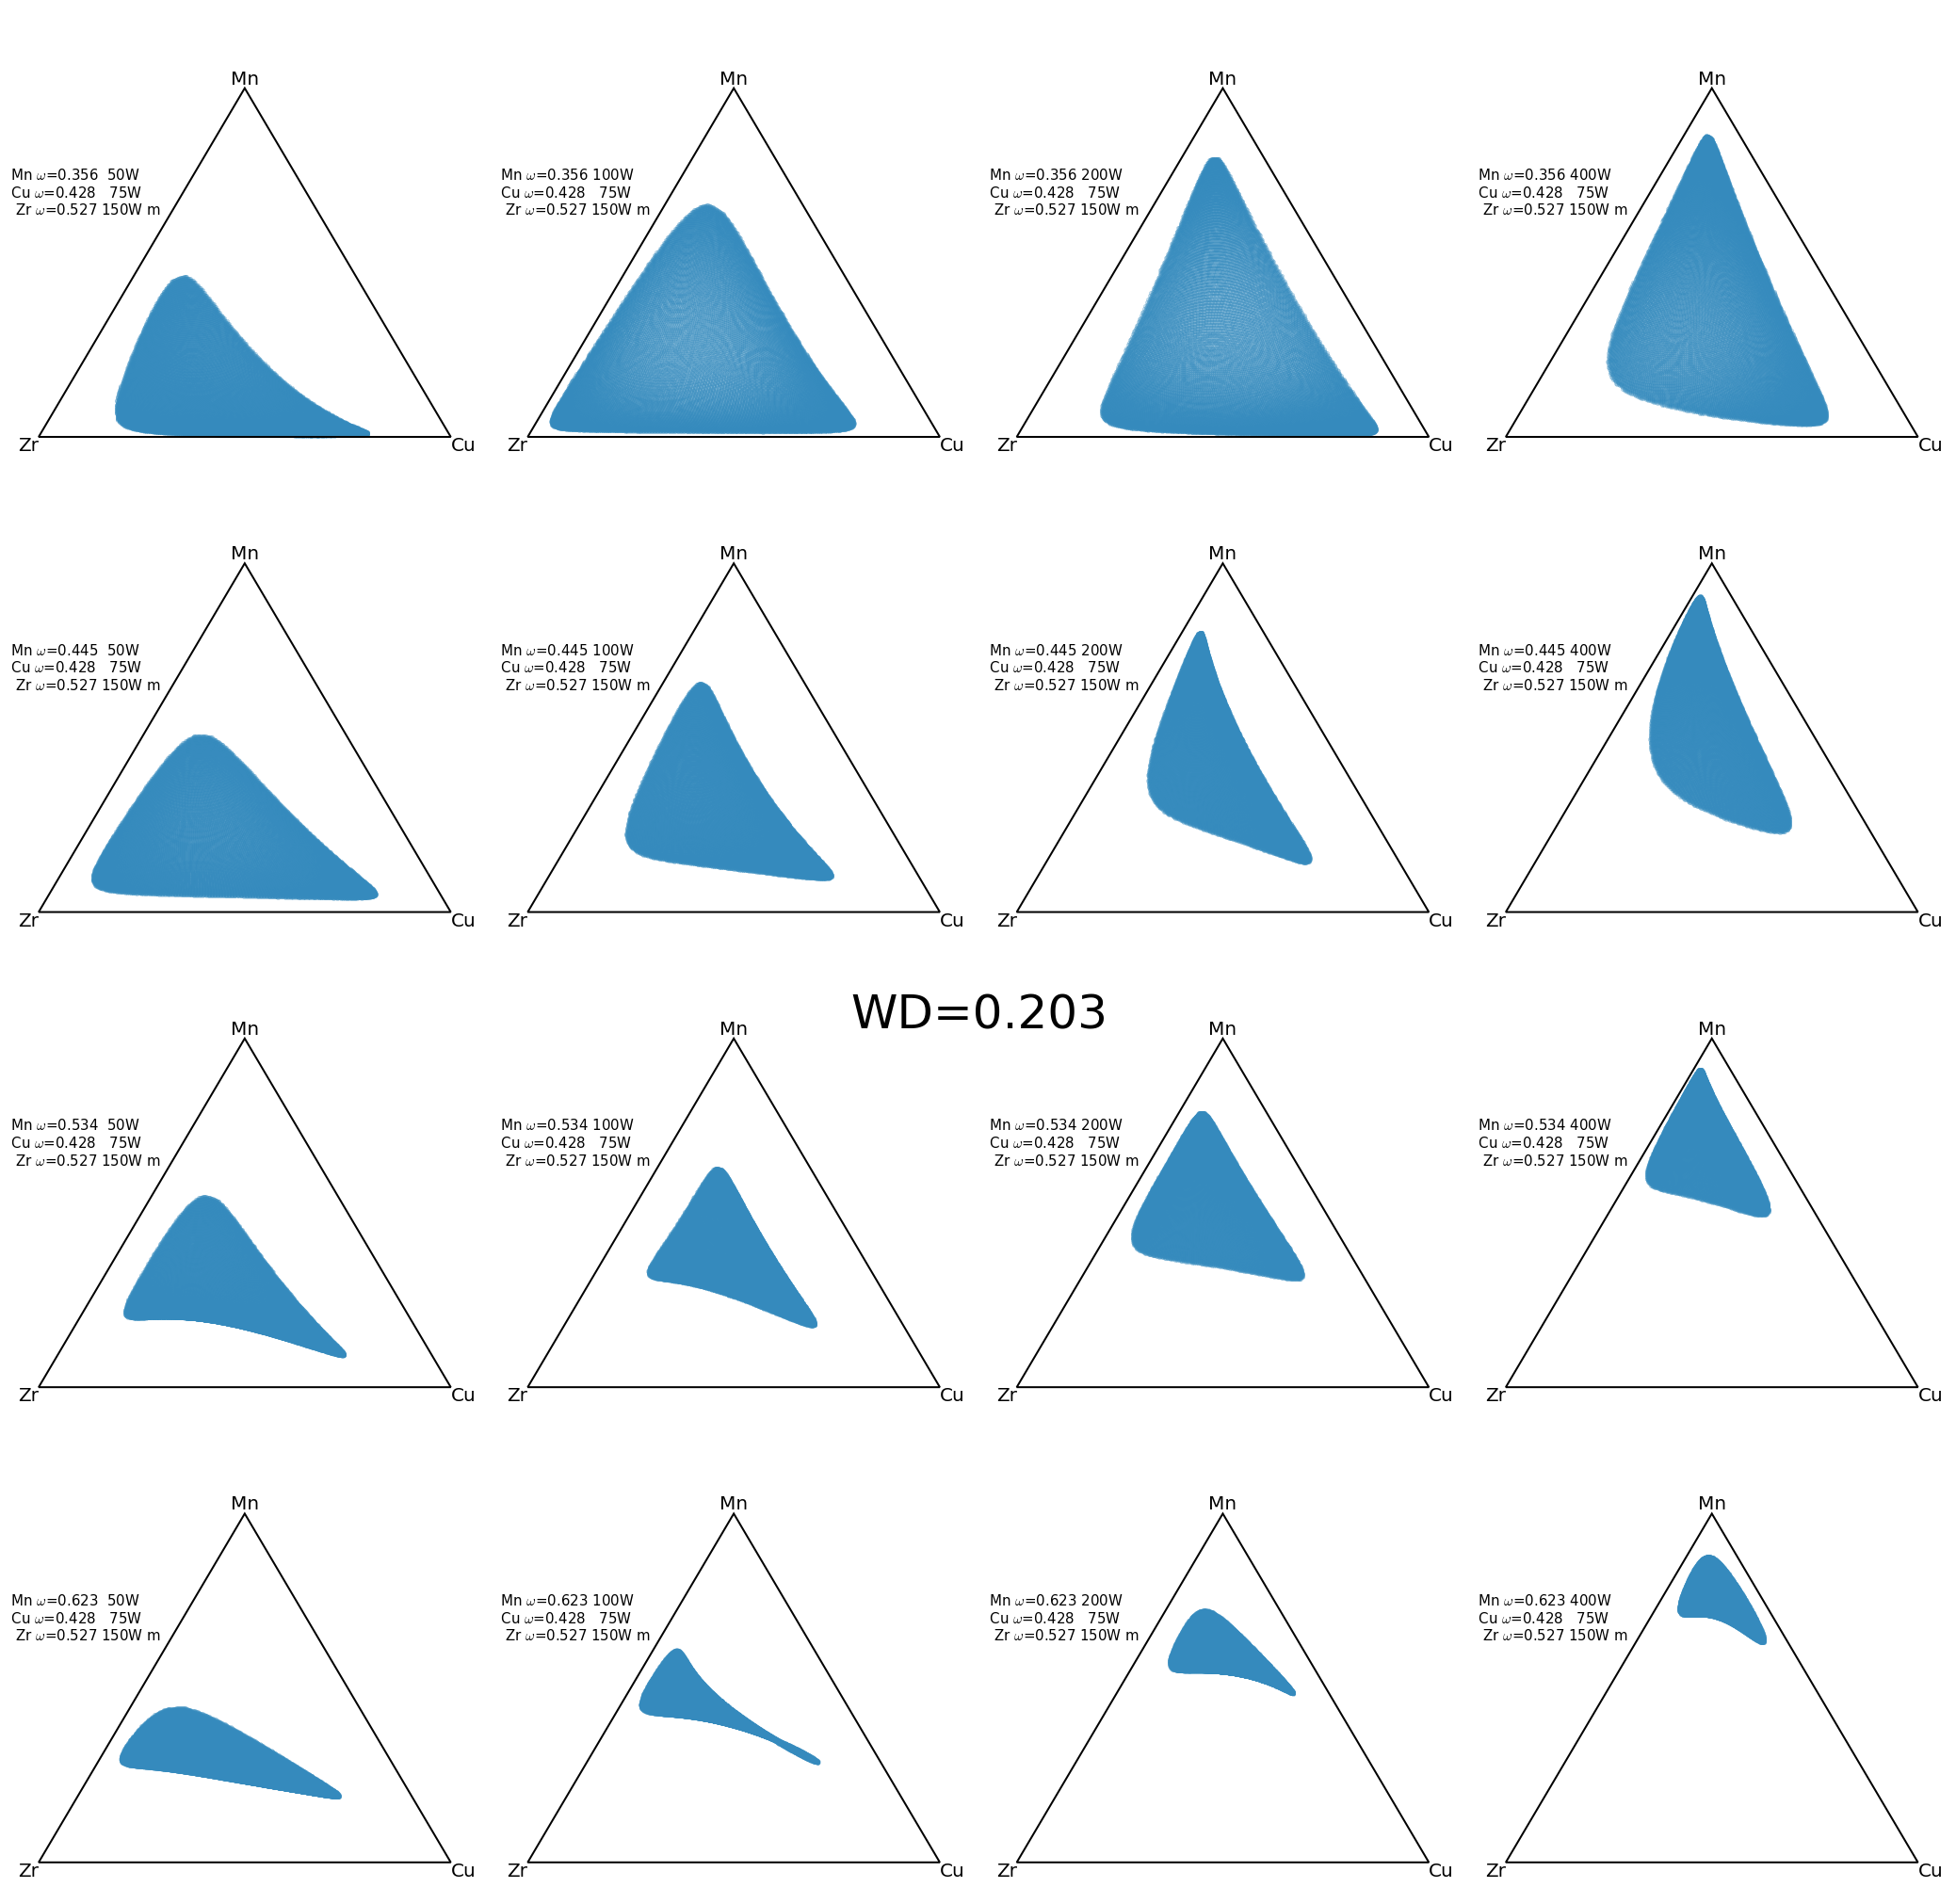

<p style="text-align: center;">  <b> Figure 20: </b> Varying power and angle for Gun 1 changes the composition space. Another important variable is working distance WD, which can be changed, but is kept constant for this matrix of plots. </p>

## Discussion



### Aim 1: Accurate single-gun DC Magnetron Sputtering Model

In two independent experiments, average errors of $\approx 2 \%$ were obtained, which peaks of $< 2\% $ Considering the error sources in resistivity measurements (discussed in Experimental Data Collection section), this may match the uncertainty of the data collection method. Without more accurate data collection methods such as profilometers, stronger conclusions cannot be made. This is discussed further in the Future section.

Furthermore, even without resputtering parameters, $< 6\% $ average error is obtained with an independent measurement tool (atomic ratios), supporting the accuracy of this model. 

### Aim 2: Accurate multiple-gun DC Magnetron Sputtering Model

With resputtering, errors of less than 2 percent are obtained for Experiment 3 with two simultaneous guns. This is a promising result.

Limited to a single experiment due to time constraints, the merits of the multi-gun model with resputtering is difficult to assess. However, for the given experiment, it is demonstrated that resputtering reduces deviation from experimental data, hence supporting the validity of implemented rersputtering model. More discussion will follow in Limitations and Future sections. 



### Limitations

This model ignores the effects of self-resputtering (intrinsic resputtering) in the single gun model. This is somewhat justified, as the paper by Gregoire et. al states that self-sputtering is very low in metal sputtering [11].

A major limitation of this model's assessment is the substrate characterization methodology. Optical or stylus-based profilometers offer much greater accuracy and detail in thickness measurements, alongside providing absolute values. These values, combined with atomic ratio measurements, would enable discussion of sputtered thin film atomic structure - answering questions about density compared to bulk material. Furthermore, these methods generate large amount of data that is simultaneously collected, greatly reducing the time demands in the cleanroom, a major cost. Lastly, better data about relative deposition would enable stronger conclusions about the model. 

Another critical limitation of the model assessment is the low amount of experimental data. Currently, there are more 'optimized parameters' than number of experiments- alpha and nine resputter coefficients. Under these conditions, the optimization proces for the resputter coefficients could be solely correcting for model errors instead of representing effects of resputtering. 

A relatively less important limitation is shown in interpolation - As monte Carlo method relies on large number of instances to increase accuracy, large number of points is preferred for more stable results. However, the interpolation function used in this model fails with more than one million points. 


Solutions to these limitations are addressed in the Future section.

### Future

#### Future Experiments

The following table summarizes the list of experiments proposed for this project but not completed due to time and access constraints. They tackle the limitations mentioned in the previous section.




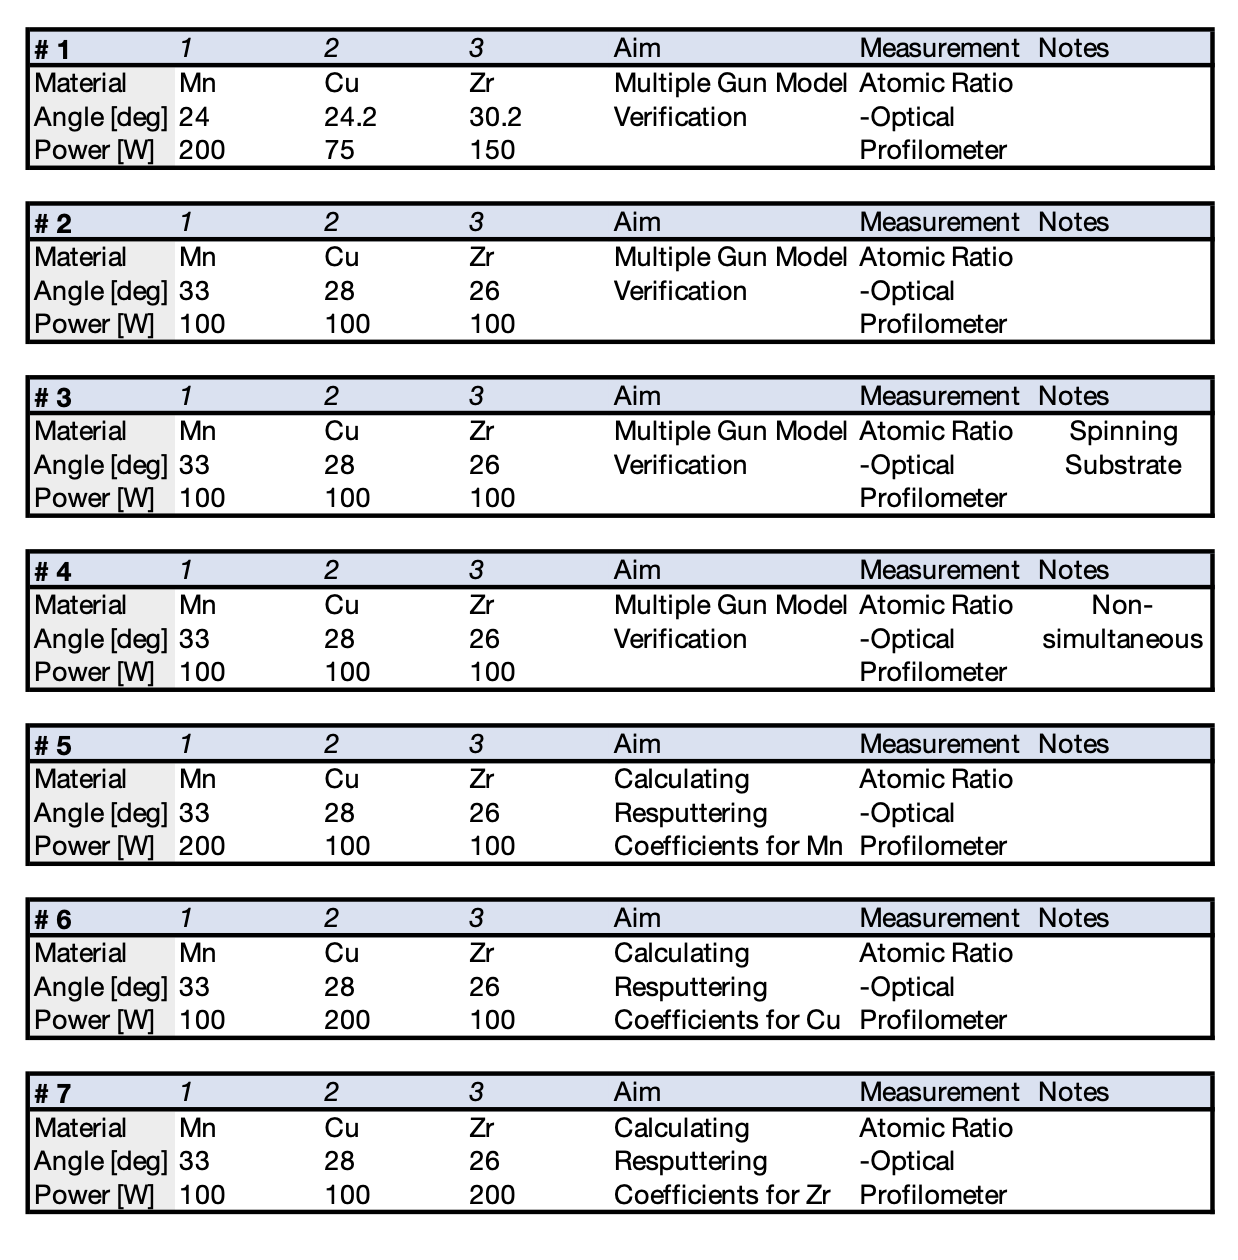

Specifically, three gun experiments are proposed to compare composition space plots to provide another accuracy evalution tool.

Independent simultaneous sputtering experiments are proposed to calculate resputtering coefficients. 

A spinning substrate experiment are proposed to experimentically calculate sputtering yield ratios rather than using reference values.

Non simultanenous multiple-gun deposition experiments are proposed to investigate resputtering when the substrate surface already has a thin-film on it. 

Furthermore, the code can be developed to generate a set of experimental setup parameters for an desired region in composition space. 

## References


[1]	Y. Yamamura, N. Matsunami, and N. Itoh, “Theoretical studies on an empirical formula for sputtering yield at normal incidence,” Radiat. Eff., vol. 71, no. 1–2, pp. 65–86, Jan. 1983, doi: 10.1080/00337578308218604.

[2]	Y. Shi, Q. Huang, R. Qi, Z. Shen, Z. Zhang, and Z. Wang, “Theoretical and Experimental Study of Particle Distribution from Magnetron Sputtering with Masks for Accurate Thickness Profile Control,” Coatings, vol. 10, no. 4, p. 357, Apr. 2020, doi: 10.3390/coatings10040357.

[3]	W. D. Westwood, “Calculation of deposition rates in diode sputtering systems,” J. Vac. Sci. Technol., vol. 15, no. 1, pp. 1–9, Jan. 1978, doi: 10.1116/1.569429.

[4]	R. Alvarez et al., “On the Deposition Rates of Magnetron Sputtered Thin Films at Oblique Angles: Deposition Rates at Oblique Angles,” Plasma Process. Polym., vol. 11, no. 6, pp. 571–576, Jun. 2014, doi: 10.1002/ppap.201300201.

[5]	J. K. Bunn, C. J. Metting, and J. Hattrick-Simpers, “A Semi-Empirical Model for Tilted-Gun Planar Magnetron Sputtering Accounting for Chimney Shadowing,” JOM, vol. 67, no. 1, pp. 154–163, Jan. 2015, doi: 10.1007/s11837-014-1234-2.

[6]	H.-Y. Shin, T.-H. Kim, J.-W. Park, and H.-C. Sohn, “Effect of Process Parameters on the Angular Distribution of Sputtered Cu Flux in Long-Throw Sputtering System,” Korean J. Met. Mater., vol. 57, no. 7, pp. 462–467, Jul. 2019, doi: 10.3365/KJMM.2019.57.7.462.

[7]	S. Swann, “Magnetron sputtering,” Phys. Technol., vol. 19, no. 2, pp. 67–75, Mar. 1988, doi: 10.1088/0305-4624/19/2/304.

[8]	S. Swann, “Film thickness distribution in magnetron sputtering,” Vacuum, vol. 38, no. 8–10, pp. 791–794, Jan. 1988, doi: 10.1016/0042-207X(88)90465-4.

[9]	K. A. Zoerb, “DIFFERENTIAL SPUTTERING YIELDS OF REFRACTORY METALS BY ION BOMBARDMENT AT NORMAL AND OBLIQUE INCIDENCES,” Colorado State University, Fort Collins, Colorado, 2007.

[10]	“Sputtering Yield Rates.” Semicore Equipment, Inc, 2021. [Online]. Available: http://www.semicore.com/reference/sputtering-yields-reference/

[11]	J. M. Gregoire and R. B. van Dover, “A model for calculating resputter rates in codeposition,” J. Vac. Sci. Technol. Vac. Surf. Films, vol. 26, no. 4, pp. 1030–1036, Jul. 2008, doi: 10.1116/1.2885213.

[12]	M. Majkut, “Thin Films Mechanics Laboratory Facilities.” OpenScholar. [Online]. Available: https://vlassakgroup.seas.harvard.edu/thin-films-mechanics-laboratory




